In [8]:
import numpy as np
import pandas as pd
total=pd.read_csv("./total_full_5_28.csv")
import sklearn as sk
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
from matplotlib import pyplot as plt

In [9]:
from sklearn import preprocessing
le_state = preprocessing.LabelEncoder()

In [10]:
total.columns.values

array(['Unnamed: 0', 'V1', 'id', 'timestamp', 'full_sq', 'life_sq',
       'floor', 'num_room', 'kitch_sq', 'product_type', 'sub_area',
       'area_m', 'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'preschool_education_centers_raion',
       'children_school', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'healthcare_centers_raion',
       'university_top_20_raion', 'sport_objects_raion',
       'additional_education_raion', 'culture_objects_top_25',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion',
       'detention_facility_raion', 'full_all', 'male_f', 'female_f',
       'young_all', 'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female', 

In [11]:
#transforming state into categorical
le_state.fit(total["state"])

LabelEncoder()

In [12]:
total["state"] = le_state.transform(total["state"])

In [13]:
total["state"].value_counts()

1    22756
2     7703
0     7118
3      549
Name: state, dtype: int64

In [14]:
#transforming material variable 
le_material = preprocessing.LabelEncoder()
le_material.fit(total["material"])
total["material"] = le_material.transform(total["material"])

In [15]:
total["material"].value_counts()

0    29007
1     3947
4     2048
3     1963
5     1159
2        2
Name: material, dtype: int64

In [16]:
#transforming sub_area
le_subarea = preprocessing.LabelEncoder()
le_subarea.fit(total["OKRUG"])
total["OKRUG"] = le_subarea.transform(total["OKRUG"])

In [17]:
total1=total[['id','price_doc',
                'full_sq',
                'life_sq',
                'num_room',
                'sport_count_5000',
                'trc_count_5000',
                'zd_vokzaly_avto_km',
                'sadovoe_km',
                'kremlin_km',
                'bulvar_ring_km',
                'ttk_km',
                'office_sqm_5000',
                'nuclear_reactor_km',
                'sport_objects_raion',
                'cafe_count_5000_price_1000',
                'stadium_km',
                'kitch_sq',
                'university_km',
                'theater_km',
                'swim_pool_km',
                'catering_km',
                'thermal_power_plant_km',
                'workplaces_km',
                'market_count_5000',
                'school_education_centers_raion',
                'big_church_km',
                'metro_min_avto',
                'healthcare_centers_raion',
                'shopping_centers_km',
                'mosque_count_5000',
                'public_healthcare_km',
                'ekder_all',
                'area_m',
                'university_top_20_raion',
                'leisure_count_500',
                'big_road2_km',
                'bus_terminal_avto_km',
                'ratio_brick',
                'green_part_5000',
                'ice_rink_km',
                'raion_popul',
                'hospice_morgue_km',
                'additional_education_km',
                'school_km',
                'ratio_1920',
                'railroad_station_avto_min','OKRUG','train_or_test']]

In [21]:
a = pd.get_dummies(total1.state)
L = range(0, len(a.columns))
a.columns = ["state_"+str(x) for x in L]
total1 = pd.concat([total1,a], axis=1)

In [18]:
b = pd.get_dummies(total1.OKRUG)
L = range(0, len(b.columns))
b.columns = ["OKRUG_"+str(x) for x in L]
total1 = pd.concat([total1,b],axis=1)

In [23]:
c = pd.get_dummies(total1.material)
L = range(0, len(c.columns))
c.columns = ["material_"+str(x) for x in L]
total1 = pd.concat([total1,c],axis=1)

In [24]:
total1

,id,price_doc,full_sq,life_sq,num_room,sport_count_5000,trc_count_5000,zd_vokzaly_avto_km,sadovoe_km,kremlin_km,...,sub_area_142,sub_area_143,sub_area_144,sub_area_145,material_0,material_1,material_2,material_3,material_4,material_5
0,1,5850000.0,43.00,27.000000,2.0,52,52,14.231961,13.100618,15.156211,...,0,0,0,0,1,0,0,0,0,0
1,2,6000000.0,34.00,19.000000,2.0,66,40,9.242586,6.444333,8.698054,...,0,0,0,0,1,0,0,0,0,0
2,3,5700000.0,43.00,29.000000,2.0,67,35,9.540544,6.963403,9.067885,...,0,0,0,0,1,0,0,0,0,0
3,4,13100000.0,89.00,50.000000,2.0,26,22,17.478380,17.457198,19.487005,...,0,0,0,0,1,0,0,0,0,0
4,5,16331452.0,77.00,77.000000,2.0,195,114,1.595898,0.046810,2.578671,...,0,0,0,0,1,0,0,0,0,0
5,6,9100000.0,67.00,46.000000,2.0,113,63,5.070197,3.519389,5.645796,...,0,0,0,0,1,0,0,0,0,0
6,7,5500000.0,25.00,14.000000,2.0,127,49,3.028547,3.940566,6.468719,...,0,0,0,0,1,0,0,0,0,0
7,8,2000000.0,44.00,44.000000,2.0,47,45,14.434462,13.713752,15.770426,...,0,0,0,0,1,0,0,0,0,0
8,9,5300000.0,42.00,27.000000,2.0,85,41,7.500715,8.290837,10.357535,...,0,0,0,0,1,0,0,0,0,0
9,10,2000000.0,36.00,21.000000,2.0,67,32,10.229145,8.955785,10.869120,...,0,0,0,0,1,0,0,0,0,0


In [297]:
total1.columns.values

array(['id', 'price_doc', 'full_sq', 'life_sq', 'num_room',
       'sport_count_5000', 'trc_count_5000', 'zd_vokzaly_avto_km',
       'sadovoe_km', 'kremlin_km', 'bulvar_ring_km', 'ttk_km',
       'office_sqm_5000', 'nuclear_reactor_km', 'sport_objects_raion',
       'cafe_count_5000_price_1000', 'stadium_km', 'kitch_sq',
       'university_km', 'theater_km', 'swim_pool_km', 'catering_km',
       'thermal_power_plant_km', 'workplaces_km', 'market_count_5000',
       'school_education_centers_raion', 'big_church_km', 'metro_min_avto',
       'healthcare_centers_raion', 'shopping_centers_km',
       'mosque_count_5000', 'public_healthcare_km', 'ekder_all', 'area_m',
       'university_top_20_raion', 'leisure_count_500', 'big_road2_km',
       'bus_terminal_avto_km', 'ratio_brick', 'green_part_5000',
       'ice_rink_km', 'raion_popul', 'hospice_morgue_km',
       'additional_education_km', 'school_km', 'ratio_1920',
       'railroad_station_avto_min', 'OKRUG', 'train_or_test', 'OKRUG_0',

In [47]:
total1.drop(["OKRUG"],inplace= True,axis=1)

ValueError: labels ['OKRUG'] not contained in axis

In [48]:
test = total1[total1["train_or_test"]=="test"]
train = total1[total1["train_or_test"]=="train"]

In [49]:
test = test.drop(["id","train_or_test","price_doc"], axis= 1)

In [50]:
train = train.drop(["id","train_or_test"], axis=1)

In [51]:
train["log_price"] = train["price_doc"].apply(np.log)

In [52]:
train = train.drop(["price_doc"], axis=1)

In [63]:
train.shape

(30464, 58)

In [54]:
test.shape

(7662, 57)

In [55]:
train.shape

(30464, 58)

In [28]:
train.columns.values

array(['full_sq', 'life_sq', 'num_room', 'sport_count_5000',
       'trc_count_5000', 'zd_vokzaly_avto_km', 'sadovoe_km', 'kremlin_km',
       'bulvar_ring_km', 'ttk_km', 'office_sqm_5000', 'nuclear_reactor_km',
       'sport_objects_raion', 'cafe_count_5000_price_1000', 'stadium_km',
       'kitch_sq', 'university_km', 'theater_km', 'swim_pool_km',
       'catering_km', 'thermal_power_plant_km', 'workplaces_km',
       'market_count_5000', 'school_education_centers_raion',
       'big_church_km', 'metro_min_avto', 'healthcare_centers_raion',
       'shopping_centers_km', 'mosque_count_5000', 'public_healthcare_km',
       'ekder_all', 'area_m', 'university_top_20_raion',
       'leisure_count_500', 'big_road2_km', 'bus_terminal_avto_km',
       'ratio_brick', 'green_part_5000', 'ice_rink_km', 'raion_popul',
       'hospice_morgue_km', 'additional_education_km', 'school_km',
       'ratio_1920', 'railroad_station_avto_min', 'OKRUG_0', 'OKRUG_1',
       'OKRUG_2', 'OKRUG_3', 'OKRUG_4', 

In [56]:
total_data = train.iloc[:,0:57]
total_target = train["log_price"]

In [309]:
total_data.shape

(30464, 57)

In [166]:
x = pd.isnull(total_data)
x.apply(sum)

full_sq                           0
life_sq                           0
num_room                          0
sport_count_5000                  0
trc_count_5000                    0
zd_vokzaly_avto_km                0
sadovoe_km                        0
kremlin_km                        0
bulvar_ring_km                    0
ttk_km                            0
office_sqm_5000                   0
nuclear_reactor_km                0
sport_objects_raion               0
cafe_count_5000_price_1000        0
stadium_km                        0
kitch_sq                          0
university_km                     0
theater_km                        0
swim_pool_km                      0
catering_km                       0
thermal_power_plant_km            0
workplaces_km                     0
market_count_5000                 0
school_education_centers_raion    0
big_church_km                     0
metro_min_avto                    0
healthcare_centers_raion          0
shopping_centers_km         

In [167]:
from sklearn.cross_validation import train_test_split
data_train, data_test, target_train, target_test = train_test_split(total_data, total_target, test_size=0.3 )
randomForest.fit(data_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [168]:
randomForest.score(data_train, target_train)

0.86790514552538611

In [57]:
randomForest1 = ensemble.RandomForestRegressor(max_depth = 10, oob_score = True)

In [58]:
randomForest1.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
max_features = range(7,12,1)
n_estimators = range(100,600,100)
grid_para_forest = {
    'max_features': max_features,
    'n_estimators': n_estimators
}

In [60]:
from sklearn.model_selection import GridSearchCV
para_search = GridSearchCV(estimator = randomForest1, 
                           param_grid = grid_para_forest, cv=10).fit(total_data, total_target)

In [31]:
para_search.cv_results_.get("mean_train_score"),para_search.cv_results_.get("mean_test_score")

(array([ 0.52664565,  0.52708758,  0.5272154 ,  0.52685429,  0.52750917,
         0.53090693,  0.53227979,  0.53287544,  0.53293374,  0.53299758,
         0.53570139,  0.53637156,  0.53671423,  0.53684567,  0.53682553,
         0.53791231,  0.53902389,  0.53916342,  0.53928031,  0.53923002,
         0.53907642,  0.54055784,  0.5407657 ,  0.54112326,  0.54111913,
         0.54155889,  0.54180296,  0.5421279 ,  0.54198233,  0.54190677,
         0.54201277,  0.54252989,  0.54311888,  0.54307775,  0.54299769]),
 array([ 0.38238796,  0.3846563 ,  0.38396525,  0.38414121,  0.384928  ,
         0.38244296,  0.38445081,  0.38470242,  0.38455813,  0.38482802,
         0.38267741,  0.38288083,  0.38401852,  0.3839173 ,  0.38432407,
         0.38218657,  0.38328734,  0.38320948,  0.38336253,  0.38387744,
         0.3810284 ,  0.38248366,  0.38296808,  0.38251883,  0.3827397 ,
         0.38069576,  0.38099704,  0.38148382,  0.38165902,  0.38189745,
         0.37983323,  0.38086851,  0.38160901,  0

In [61]:
para_search.cv_results_

{'mean_fit_time': array([  9.78176842,  19.6516315 ,  31.34323366,  43.29873998,
         56.18187673,  12.97680182,  24.8214026 ,  41.14804513,
         52.84622958,  52.11921992,   8.88044338,  18.67005825,
         28.22328529,  36.92778125,  44.85180175,   9.61881409,
         20.59223449,  32.43732734,  45.55084078,  52.71757991,
         10.3940552 ,  21.8848923 ,  33.189733  ,  46.54284863,  56.63957989]),
 'mean_score_time': array([ 0.1490912 ,  0.32984788,  0.46287138,  0.70176804,  0.88569233,
         0.17108819,  0.36436729,  0.55186548,  0.79493351,  0.66646183,
         0.10200481,  0.21806254,  0.31523731,  0.42659338,  0.57176766,
         0.10179627,  0.22220042,  0.34182632,  0.5078146 ,  0.55645916,
         0.10039222,  0.20531952,  0.32070789,  0.45702858,  0.5370976 ]),
 'mean_test_score': array([ 0.37863686,  0.37953096,  0.37966102,  0.37986794,  0.37973797,
         0.38045668,  0.38099834,  0.38184989,  0.38219526,  0.38172444,
         0.38119144,  0.3822939 

In [33]:
print(list(para_search.cv_results_.keys()))

['rank_test_score', 'split6_test_score', 'split7_train_score', 'split0_train_score', 'split2_test_score', 'mean_fit_time', 'split3_train_score', 'split6_train_score', 'split9_test_score', 'std_test_score', 'params', 'split8_test_score', 'std_score_time', 'std_fit_time', 'std_train_score', 'split4_test_score', 'split1_train_score', 'split2_train_score', 'param_n_estimators', 'split4_train_score', 'mean_score_time', 'split9_train_score', 'split5_test_score', 'mean_train_score', 'split8_train_score', 'split7_test_score', 'split0_test_score', 'mean_test_score', 'param_max_features', 'split3_test_score', 'split5_train_score', 'split1_test_score']


In [6]:
x=para_search.best_estimator_.fit(total_data,total_target)

NameError: name 'para_search' is not defined

In [64]:
para_search.best_params_

{'max_features': 11, 'n_estimators': 400}

In [35]:
x=para_search.best_estimator_

In [36]:
y=x.predict(test)

In [37]:
y=np.exp(y)

In [38]:
y.shape

(7662,)

In [54]:
test_id = total1[total1["train_or_test"]=="test"][["id"]]       

In [55]:
test_id = test_id.reset_index().drop("index",axis=1)

In [56]:
test_hat = pd.DataFrame(y)

In [57]:
test_hat.columns = ["price_doc"]

In [58]:
final = pd.concat([test_id,test_hat],axis=1)

In [60]:
final.to_csv("submission_n500_area_rf.csv",index=False)

In [5]:
x.feature_importances_

NameError: name 'x' is not defined

In [47]:
test.columns

Index([u'full_sq', u'life_sq', u'num_room', u'sport_count_5000',
       u'trc_count_5000', u'zd_vokzaly_avto_km', u'sadovoe_km', u'kremlin_km',
       u'bulvar_ring_km', u'ttk_km', u'office_sqm_5000', u'nuclear_reactor_km',
       u'sport_objects_raion', u'cafe_count_5000_price_1000', u'stadium_km',
       u'kitch_sq', u'university_km', u'theater_km', u'swim_pool_km',
       u'catering_km', u'thermal_power_plant_km', u'workplaces_km',
       u'market_count_5000', u'school_education_centers_raion',
       u'big_church_km', u'metro_min_avto', u'healthcare_centers_raion',
       u'shopping_centers_km', u'mosque_count_5000', u'public_healthcare_km',
       u'ekder_all', u'area_m', u'university_top_20_raion',
       u'leisure_count_500', u'big_road2_km', u'bus_terminal_avto_km',
       u'ratio_brick', u'green_part_5000', u'ice_rink_km', u'raion_popul',
       u'hospice_morgue_km', u'additional_education_km', u'school_km',
       u'ratio_1920', u'railroad_station_avto_min', u'OKRUG_0', u'OKR

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(test.columns, x.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False).plot(kind='bar',figsize=(30,10), rot=45)
plt.savefig('Gini_importance')

NameError: name 'test' is not defined

/Users/mac/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


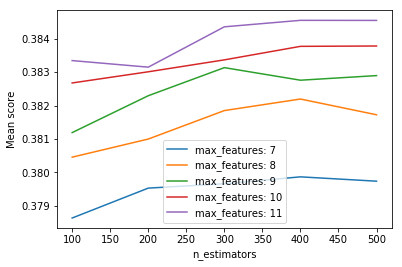

In [62]:
scores = [x[1] for x in para_search.grid_scores_]
scores = np.array(scores).reshape(len(max_features), len(n_estimators))

for ind, i in enumerate(max_features):
    plt.plot(n_estimators, scores[ind], label='max_features: ' + str(i))

plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean score')
plt.show()

Index([u'full_sq', u'life_sq', u'num_room', u'sport_count_5000',
       u'trc_count_5000', u'zd_vokzaly_avto_km', u'sadovoe_km', u'kremlin_km',
       u'bulvar_ring_km', u'ttk_km', u'office_sqm_5000', u'nuclear_reactor_km',
       u'sport_objects_raion', u'cafe_count_5000_price_1000', u'stadium_km',
       u'kitch_sq', u'university_km', u'theater_km', u'swim_pool_km',
       u'catering_km', u'thermal_power_plant_km', u'workplaces_km',
       u'market_count_5000', u'school_education_centers_raion',
       u'big_church_km', u'metro_min_avto', u'healthcare_centers_raion',
       u'shopping_centers_km', u'mosque_count_5000', u'public_healthcare_km',
       u'ekder_all', u'area_m', u'university_top_20_raion',
       u'leisure_count_500', u'big_road2_km', u'bus_terminal_avto_km',
       u'ratio_brick', u'green_part_5000', u'ice_rink_km', u'raion_popul',
       u'hospice_morgue_km', u'additional_education_km', u'school_km',
       u'ratio_1920', u'railroad_station_avto_min'],
      dtype='obj

In [ ]:
#L.append(total.columns[12])

#L.extend(total.columns[15:19])



